In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plotten von Tabelle 1

['18', '0.9985976', '18.5', '0.9985038', '19', '0.9984073', '19.5', '0.9983081', '20', '0.9982063', '20.5', '0.9981019', '21', '0.9979948', '21.5', '0.9978852', '22', '0.997773', '22.5', '0.9976584', '23', '0.9975412', '23.5', '0.9974215', '24', '0.9972994', '24.5', '0.9971749', '25', '0.997048', '25.5', '0.9969186', '26', '0.996787', '26.5', '0.996653']
[ 1.33907302e-11 -1.98390893e-08  1.17894266e-05 -3.51744085e-03
  5.27342899e-01 -3.07940050e+01]


Text(0, 0.5, 'Druck ρ / g/cm³')

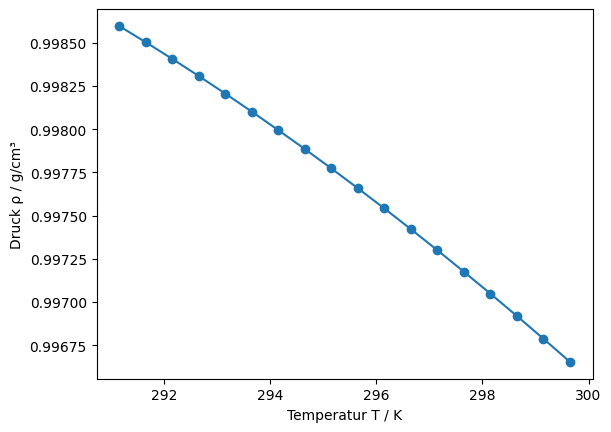

In [2]:
tabelle_1 = """18 0,9985976
18,5 0,9985038
19 0,9984073
19,5 0,9983081
20 0,9982063
20,5 0,9981019
21 0,9979948
21,5 0,9978852
22 0,997773
22,5 0,9976584
23 0,9975412
23,5 0,9974215
24 0,9972994
24,5 0,9971749
25 0,997048
25,5 0,9969186
26 0,996787
26,5 0,996653""".replace("\n"," ").replace(",",".").split(" ")
print(tabelle_1)
temp_dichte_wasser = {}
for i in range(int(len(tabelle_1) / 2)):
    temp_dichte_wasser.update({float(tabelle_1[i * 2]) + 273.15: float(tabelle_1[i * 2 + 1])})

Ts = np.array(list(temp_dichte_wasser.keys()))
Ps = np.array(list(temp_dichte_wasser.values()))

fig, ax = plt.subplots()
degree = 5
polyparams = np.polyfit(Ts,Ps,degree)
print(polyparams)
ax.scatter(Ts,Ps)
def rec_degree(T,d):
    if(d<=0):
        return polyparams[degree]

    else:
        return polyparams[degree-d] * T**d + rec_degree(T,d-1)

ax.plot(Ts, rec_degree(Ts,degree))

ax.set_xlabel("Temperatur T / K")
ax.set_ylabel("Druck ρ / g/cm³")


# Plotten von Tabelle 2
Im ersten Versuch wurde versucht mehrere lineare Regressionen zu kombinieren. Dies war jedoch nicht hinreichend genau.
Um genauere Ergebnisse zu erzielen wurde eine Regression ersten Grades in Abhängigkeit beider Variablen durchgeführt:

In [3]:
from scipy.optimize import curve_fit


def tabelle_2_fit(input, a, b, c):
    Ts = input[:, 0]
    ps = input[:, 1]
    return ps * a + Ts * b + c


druck = ([0.960, 0.973, 0.987, 1.000, 1.013, 1.026])
temperaturen = ([288.15, 293.15, 298.15])
data_in = []
for T in temperaturen:
    for p in druck:
        data_in.append(([T, p]))
Z = np.array(
    [1.157, 1.173, 1.190, 1.206, 1.222, 1.238, 1.136, 1.152, 1.168, 1.184, 1.199, 1.215, 1.115, 1.131, 1.146, 1.162,
     1.177, 1.193])
popt, pcov = curve_fit(tabelle_2_fit, data_in, Z)
a, b, c = popt


Es ergibt sich relativ gut funktionierender Fit, wie im folgenden Plot beobachtet werden kann.

Text(0.5, 1.0, 'Tabelle 2 mit einem einzigen Fit')

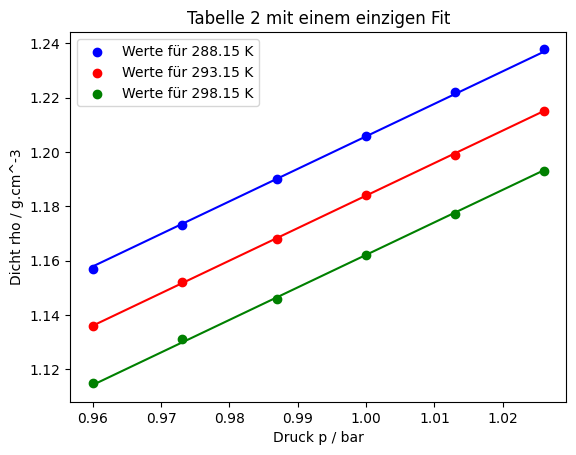

In [4]:

def dichte_luft(p,T):
    return a * p + b * T +c

temp_druck_dichte_luft = [
    np.array([0.960, 0.973, 0.987, 1.000, 1.013, 1.026]),
    np.array([1.157, 1.173, 1.190, 1.206, 1.222, 1.238]),
    np.array([1.136, 1.152, 1.168, 1.184, 1.199, 1.215]),
    np.array([1.115, 1.131, 1.146, 1.162, 1.177, 1.193]),
]
fig, ax = plt.subplots()
Temperaturen_tabelle_2 = [288.15, 293.15, 298.15]
colors = ["blue", "red", "green"]

for i in range(3):
    ax.plot(temp_druck_dichte_luft[0],
            dichte_luft(temp_druck_dichte_luft[0],Temperaturen_tabelle_2[i]),
            c=colors[i])

for i in range(3):
    ax.scatter(temp_druck_dichte_luft[0], temp_druck_dichte_luft[i + 1], c=colors[i], label=f"Werte für {Temperaturen_tabelle_2[i]} K")
ax.set_xlabel("Druck p / bar")
ax.legend()
ax.set_ylabel("Dicht rho / g.cm^-3")
ax.set_title("Tabelle 2 mit einem einzigen Fit")

# Dichte der Luft bei einer Temperatur von T = 21,2°C und bei einem Druck von p= 1,007 bar

Aus dem Diagramm ergibt sich, dass die Dichte Steigungen der Graphen von der Temperatur quasi unabhänhig sind. Die Temperatur fließt lediglich in den y-Achsenabschnitt ein. Es wird demnach der Mittelwert der Steigungen bestimmt und durch lineare Regression der y-Achsenabschnitt bestimmt

In [5]:
print(dichte_luft(1.007,273.15+21.2))

1.1871083702296557


# Plotten von Tabelle 3

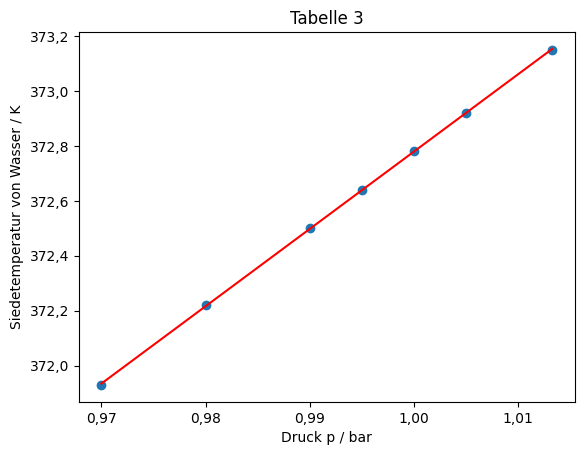

Siedetemperatur von Wasser bei 1007,1 mbar: 373.0 K


In [36]:
ps = np.array([float(x) for x in "0.970 0.980 0.990 0.995 1.000 1.005 1.01325".split(" ")])
Ts = np.array([float(x) for x in "98.78 99.07 99.35 99.49 99.63 99.77 100".split(" ")]) + 273.15
#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcParams['axes.formatter.use_locale'] = True
fig, ax = plt.subplots()

ax.scatter(ps, Ts, label="Datenwerte")
linregress_tabelle3 = linregress(ps, Ts)
ax.plot(ps, ps * linregress_tabelle3.slope + linregress_tabelle3.intercept,
        c="red",
        label=f"Fit mit m={np.format_float_scientific(linregress_tabelle3.slope, 4)} und c={np.format_float_scientific(linregress_tabelle3.intercept, 4)}")
ax.set_xlabel("Druck p / bar")
ax.set_ylabel("Siedetemperatur von Wasser / K")
ax.set_title("Tabelle 3")

plt.show()
fig.savefig("img/P1/Tabelle3.png",transparent=True)
print(
    f"Siedetemperatur von Wasser bei 1007,1 mbar: {round(linregress_tabelle3.slope * 1007.1e-3 + linregress_tabelle3.intercept, 1)} K")

# Mindestvolumen Ester

In [29]:
dichte_ester = 0.9e3  #g/L
p=1.0205
T_kolben_siedend = p * linregress_tabelle3.slope + linregress_tabelle3.intercept
print(T_kolben_siedend)
V = 0.329e-3  # m³
R = 8.3145
molare_masse = 12.011 * 4 + 2 * 15.999 + 8 * 1.008
n_Kolben = (p * V) / (R * T_kolben_siedend)

masse_ester = molare_masse * n_Kolben
volumen_ester = masse_ester / dichte_ester
print(f"Mindestvolumen: {np.format_float_scientific(volumen_ester, 4)} L")


373.3568423593076
Mindestvolumen: 1.0588e-08 L


# Auswertung (Nicht fürs Antestat!!!)

In [20]:
T_kolben_wasser = 273.15+22.8
T_luft = 273.15 +21.2
m_kolben_wasser= 408.053
m_kolben_leer = 80.278

def molare_masse(m_kolben_ester, p):
    T_kolben_siedend = p * linregress_tabelle3.slope + linregress_tabelle3.intercept
    dichte_wasser = rec_degree(T_kolben_wasser,5)
    v_kolben = (m_kolben_wasser - m_kolben_leer) / dichte_wasser
    v_kolben = v_kolben*1e-3
    m_ester = (m_kolben_ester - (m_kolben_leer - dichte_luft(p,T_luft) * v_kolben))
    m_ester = m_ester * 1e-3  # Umrechnung SI
    print(v_kolben)
    return (
        (m_ester * R * T_kolben_siedend)
        / 
        (v_kolben * 1e-3 # Volumen in SI
         *
         p * 1e5) # Druck in SI
    ) * 1e3 # Ausgabe in g


In [21]:
versuch_1 = [

    80.861,  # Masse mit Ester im Kolben

    1.0205,  # Luftdruck
]
molare_masse_1 = molare_masse(*versuch_1)


0.32856738934727003


In [18]:
versuch_2 = [

    81.296,  # Masse mit Ester im Kolben (Dieser Wert ist als Aureißer vermutlich falsch)

    1.0206,  # Luftdruck
]

versuch_3 = [

    80.915,  # Masse mit Ester im Kolben

    1.0203,  # Luftdruck
]
print(f"Molmassen: {np.array([molare_masse_1,molare_masse(*versuch_2), molare_masse(*versuch_3)])}")


Molmassen: [ 95.6294647  139.66270101 101.10777797]


Der zweite Wert ist offensichtlich ein Ausreißer, was sich auch mit fehlern bei der Durchführung deckt. Der Mittelwert wird somit ohne den zweiten Wert berechnet.

In [19]:
mittlere_molmasse = (molare_masse_1  + molare_masse(*versuch_3)) / 2
print(f"Mittlere Molmasse: {mittlere_molmasse}")
print(f"Abweichung: {round((mittlere_molmasse/88.11-1)*100,3)}%")

Mittlere Molmasse: 98.36862133526296
Abweichung: 11.643%
